# Campo de gravidade, Geoide e Topografia

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr

In [2]:
import read_data

In [3]:
notebook_name = '1.2. gravity_earth.ipynb'

### Plot Style

In [4]:
plt.style.use('ggplot')

### Carregando os dados 

##### utilizando pandas

In [5]:
fname_grav = 'data_set/gravity_05deg_EIGEN-6C4.csv'

In [6]:
grav = pd.read_csv(fname_grav)

##### utilizando xarray

In [7]:
fname_geo = 'data_set/geoid_05deg_EIGEN-6C4.nc'

In [8]:
fname_topo = 'data_set/topography_etopo1_05deg.nc'

In [9]:
geo = read_data.fetch_dataset(fname_geo)

In [10]:
topo = read_data.fetch_dataset(fname_topo)

#### Armazenando os dados em vetores

In [11]:
lon = geo.longitude

In [12]:
lat = geo.latitude

In [13]:
grav_terra = np.reshape(grav.gravity.values,(lat.size,lon.size))

In [14]:
geoide = geo.geoid

In [15]:
topografia = topo.topography

## Visualização dos dados de gravidade, geoide e topografia para o mundo inteiro

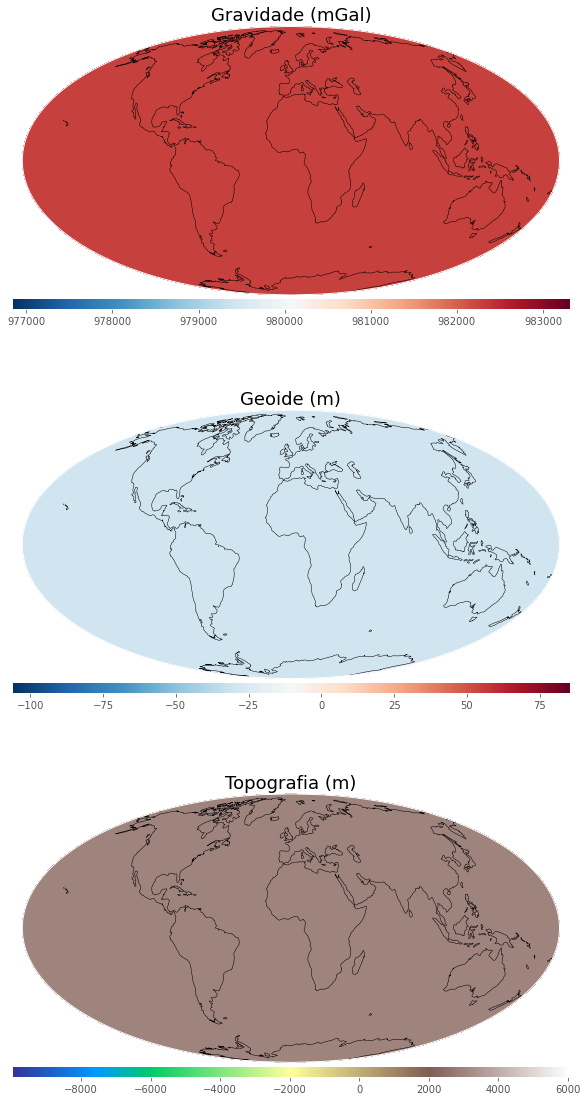

In [16]:
title_font = 18
bottom_font = 15
plt.figure(figsize=(20,20))
projection = ccrs.Mollweide()

### Campo de gravidade
ax = plt.subplot(311,projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Gravidade (mGal)',size=title_font)
pg = ax.pcolor(lon,
               lat,
               grav_terra,shading='auto',transform=ccrs.PlateCarree(),cmap='RdBu_r')
cb = plt.colorbar(pg, orientation="horizontal", pad=0.01, aspect=50, shrink=0.5)

### Geoide
ax = plt.subplot(312,projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Geoide (m)',size=title_font)
pg = ax.pcolor(lon,
               lat,
               geoide,shading='auto',transform=ccrs.PlateCarree(),cmap='RdBu_r')
cb = plt.colorbar(pg, orientation="horizontal", pad=0.01, aspect=50, shrink=0.5)

### Topografia
ax = plt.subplot(313,projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Topografia (m)',size=title_font)
pg = ax.pcolor(lon,
               lat,
               topografia,shading='auto',transform=ccrs.PlateCarree(),cmap='terrain')
cb = plt.colorbar(pg, orientation="horizontal", pad=0.01, aspect=50, shrink=0.5)

plt.show()